# [최종평가주차 코딩 실습](딥러닝 01. 신경망 기초 이론_케라스를 사용한 신경망 구현_20200206_03) keras를 사용하여 fashion_mnist데이터를 분류하는 모델을 만드세요
* keras로 fashion_mnist를 학습시키세요
* 모델이 예측한 test set데이터 X_test[20]의 class를 출력하고, X_test0[20]이미지를 출력하여 정확히 예측했는지 판단하세요
```
class 구분
0 : 티셔츠/탑
1 : 바지
2 : 풀오버(스웨터의 일종)
3 : 드레스
4 : 코트
5 : 샌들
6 : 셔츠
7 : 스니커즈
8 : 가방
9 : 앵클 부츠
```


In [11]:
# 이 코드를 먼저 실행하세요

from tensorflow import keras

fashion_mnist = keras.datasets.fashion_mnist
(X_train0, y_train0), (X_test0, y_test0) = fashion_mnist.load_data()

import matplotlib.pylab as plt

In [12]:
# 여기에 코드를 작성하세요
X_train0.shape, X_train0.dtype, X_test0.shape, X_test0.dtype

((60000, 28, 28), dtype('uint8'), (10000, 28, 28), dtype('uint8'))

In [13]:
X_train = X_train0.reshape(60000, 784).astype('float32') / 255.0
X_test = X_test0.reshape(10000, 784).astype('float32') / 255.0
print(X_train.shape, X_train.dtype, X_test.shape, X_test.dtype)

(60000, 784) float32 (10000, 784) float32


In [14]:
y_train0[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

In [15]:
# One-Hot Encoding
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(y_train0, 10)
Y_test = to_categorical(y_test0, 10)

Y_train[:5], Y_test[:5]

(array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32))

In [16]:
# 신경망 구현
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

tf.random.set_seed(0)

model = Sequential()
model.add(Dense(15, input_dim=784, activation="sigmoid"))
model.add(Dense(10, activation="sigmoid"))

model.compile(optimizer=SGD(lr=0.2), 
              loss='mean_squared_error', 
              metrics=["accuracy"]
              )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 15)                11775     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                160       
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [18]:
%%time
hist = model.fit(X_train, Y_train,
                 epochs=50, batch_size=100,
                 validation_data=(X_test, Y_test),
                 verbose=2)

Epoch 1/50
600/600 - 1s - loss: 0.0972 - accuracy: 0.2524 - val_loss: 0.0863 - val_accuracy: 0.3369
Epoch 2/50
600/600 - 1s - loss: 0.0836 - accuracy: 0.4127 - val_loss: 0.0809 - val_accuracy: 0.4887
Epoch 3/50
600/600 - 1s - loss: 0.0783 - accuracy: 0.5104 - val_loss: 0.0758 - val_accuracy: 0.5286
Epoch 4/50
600/600 - 1s - loss: 0.0734 - accuracy: 0.5469 - val_loss: 0.0711 - val_accuracy: 0.5846
Epoch 5/50
600/600 - 1s - loss: 0.0689 - accuracy: 0.5981 - val_loss: 0.0669 - val_accuracy: 0.6103
Epoch 6/50
600/600 - 1s - loss: 0.0648 - accuracy: 0.6225 - val_loss: 0.0631 - val_accuracy: 0.6233
Epoch 7/50
600/600 - 1s - loss: 0.0611 - accuracy: 0.6388 - val_loss: 0.0597 - val_accuracy: 0.6421
Epoch 8/50
600/600 - 1s - loss: 0.0579 - accuracy: 0.6561 - val_loss: 0.0567 - val_accuracy: 0.6619
Epoch 9/50
600/600 - 1s - loss: 0.0551 - accuracy: 0.6720 - val_loss: 0.0541 - val_accuracy: 0.6733
Epoch 10/50
600/600 - 1s - loss: 0.0526 - accuracy: 0.6853 - val_loss: 0.0517 - val_accuracy: 0.6891

In [19]:
# 결과 출력 코드
model.predict_classes(X_test[[20],:],verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([2])

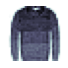

In [20]:
plt.figure(figsize=(1,1))
plt.imshow(X_test0[20],cmap=plt.cm.bone_r)
plt.grid(False)
plt.axis("off")
plt.show()